#### IMPORTING LIBRARIES
* I am using math.comb for extra purposes, not for asked questions.
* I am using random function to generate random numbers wherever required.

In [2]:
from matplotlib import pyplot as plt # used  to plot graph 
import numpy as np # used for vectorising code and for value of pi
import random # random number generator, used for random walk function
from math import comb as cmb # efficient method to calculate nCr

* It will take considerable time (in minutes) to run the code, if:  
```NO_OF_SIMULATIONS = 10000.0```
* It will take around ten to twenty seconds to run the code, if:  
```NO_OF_PEBBLES = 10000```

In [3]:
# constants related to first question
NO_OF_SIMULATIONS = 10000.0
NO_OF_STEPS = 100

# constants related to second question
NO_OF_PEBBLES = 10000

#### 1.1
* I made two functions in this part. Only first function is relevant to this part.
* The only difference between the two is that the first function gives a graph and second does not.
* I made second function because it will come handy in further parts.
* NOTE: if you open .ipynb files in vscode, the lines where input is taken from user do not work.

Enter the value of n: 10


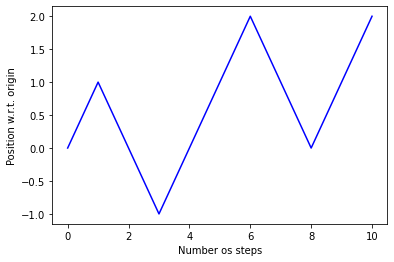

array([ 0.,  1.,  0., -1.,  0.,  1.,  2.,  1.,  0.,  1.,  2.])

In [4]:
def random_walk_with_graph(n):
    arr = np.zeros(n + 1)
    xaxis = np.zeros(n + 1)
    for i in range(1, n + 1):
        xaxis[i] = i
        arr[i] = random.choice([-1,1]) + arr[i - 1]
    plt.plot(xaxis,arr,'b')
    plt.xlabel("Number os steps")
    plt.ylabel("Position w.r.t. origin")
    plt.show()
    return arr

def random_walk(n):
    arr = np.zeros(n + 1)
    for i in range(1, n + 1):
        arr[i] = random.choice([-1,1]) + arr[i - 1]
    return arr

n = int(input("Enter the value of n: "))
random_walk_with_graph(n)

#### 1.2 PART 1

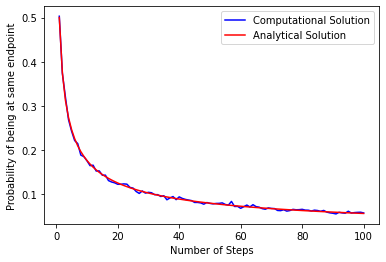

In [186]:
xc = np.zeros(NO_OF_STEPS) # x-axis

# computational solution

yc = np.zeros(NO_OF_STEPS)

for n in range(1,NO_OF_STEPS + 1):
    xc[n-1] = n
    favourable_cases = 0
    for i in range(1,int(NO_OF_SIMULATIONS + 1)):
        position1 = random_walk(n)
        position2 = random_walk(n)
        if(position1[n] == position2[n]):
            favourable_cases += 1

    p = favourable_cases/NO_OF_SIMULATIONS
    yc[n-1] = p


# analytical solution

ya = np.zeros(NO_OF_STEPS)

for n in range(1, NO_OF_STEPS + 1):
    p = 1.0/(2**(2*n)) * cmb(2*n, n)
    ya[n-1] = p

# ploting the graph

plt.plot(xc,yc,'b', label = "Computational Solution")
plt.plot(xc,ya,'r', label = "Analytical Solution")
plt.xlabel("Number of Steps")
plt.ylabel("Probability of being at same endpoint")
plt.legend()
plt.show()

#### 1.2 PART 2

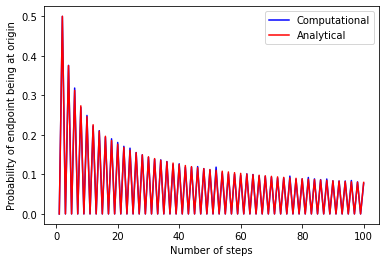

In [187]:
xc = np.zeros(NO_OF_STEPS)

# computational solution

yc = np.zeros(NO_OF_STEPS)

for n in range(1, NO_OF_STEPS + 1):
    xc[n-1] = n
    count = 0
    for i in range(1, int(NO_OF_SIMULATIONS + 1)):
        position = random_walk(n)
        if (position[n] == 0):
            count += 1

    p = count/NO_OF_SIMULATIONS
    yc[n-1] = p


# analytical solution

ya = np.zeros(NO_OF_STEPS)

for n in range(1, NO_OF_STEPS + 1):
    if n % 2 == 0:
        ya[n-1] = ((1.0/(2**(n)))*cmb(n, int(n/2)))
    else:
        ya[n-1] = (0)

# ploting the graph

plt.plot(xc, yc, 'b', label="Computational")
plt.plot(xc, ya, 'r', label="Analytical")
plt.xlabel("Number of steps")
plt.ylabel("Probability of endpoint being at origin")
plt.legend()
plt.show()


#### 1.2 PART 3: MEAN
* In this part, the scale of y axis is very small. Therefore, essentially the computational mean is also zero.

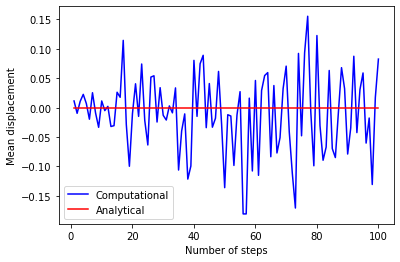

In [188]:
xc = np.zeros(NO_OF_STEPS)

# computational solution

yc = np.zeros(NO_OF_STEPS)

for n in range(1,NO_OF_STEPS + 1):
    xc[n-1] = n
    count = 0
    for i in range(1,int(NO_OF_SIMULATIONS + 1)):
        position = random_walk(n)
        count += position[n]
    p = count/NO_OF_SIMULATIONS
    yc[n-1] = p

# analytical solution

ya = np.zeros(NO_OF_STEPS)

# ploting the graph
    
plt.plot(xc,yc,'b',label="Computational")
plt.plot(xc,ya,'r',label="Analytical")
plt.xlabel("Number of steps")
plt.ylabel("Mean displacement")
plt.legend()
plt.show()


#### 1.2 PART 3: MEAN SQUARE

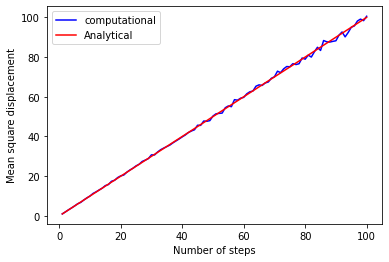

In [189]:
xc = np.zeros(NO_OF_STEPS)

# computational solution

yc = np.zeros(NO_OF_STEPS)

for n in range(1, NO_OF_STEPS + 1):
    xc[n-1] = n
    sum_of_square = 0
    for i in range(1, int(NO_OF_SIMULATIONS + 1)):
        position = random_walk(n)
        final_position = position[n]
        final_position_squared = final_position * final_position
        sum_of_square += final_position_squared

    p = sum_of_square/NO_OF_SIMULATIONS
    yc[n-1] = p

# analytical solution

ya = np.zeros(NO_OF_STEPS)

for n in range(1, NO_OF_STEPS + 1):
    msd = 0.0
    for j in range(-n, n + 1):
        if ((n - abs(j)) % 2 == 0):
            msd += ((cmb(n, int((n - abs(j))/2))) * ((j)**2))
    msd = msd / ((2.0)**n)
    ya[n-1] = msd

# ploting the graph

plt.plot(xc, yc, 'b', label="computational")
plt.plot(xc, ya, 'r', label="Analytical")
plt.xlabel("Number of steps")
plt.ylabel("Mean square displacement")
plt.legend()
plt.show()


#### 2.1

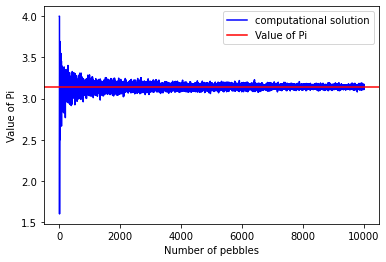

In [190]:
xc = np.zeros(NO_OF_PEBBLES)

# computational solution

yc = np.zeros(NO_OF_PEBBLES)
for n in range(1, NO_OF_PEBBLES + 1):
    xc[n-1] = n
    count = 0
    for i in range(1, n + 1):
        val1 = random.random()  # generates a random float number between 0 and 1
        val2 = random.random()  # generates a random float number between 0 and 1
        if (val1*val1 + val2*val2) < 1:
            count += 1
    pi = 4*count/n
    yc[n-1] = pi

# ploting the graph

plt.plot(xc, yc, 'b', label="computational solution")
plt.axhline(y=np.pi, color='r', label="Value of Pi")
plt.xlabel("Number of pebbles")
plt.ylabel("Value of Pi")
plt.legend()
plt.show()
